#Introduction 
Weeds to increase crop yields Weeds are an unwanted intruder in the agricultural business.
We have to detect the Crop and weeds using YOLOV8 Model.

Here we can download the dataset using wget function and unzip the download file using unzip function

In [1]:
!wget "https://s3-ap-southeast-1.amazonaws.com/he-public-data/Weed_Detection5a431d7.zip"

--2023-02-19 09:53:25--  https://s3-ap-southeast-1.amazonaws.com/he-public-data/Weed_Detection5a431d7.zip
Resolving s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)... 52.219.40.74
Connecting to s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)|52.219.40.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83058744 (79M) [binary/octet-stream]
Saving to: ‘Weed_Detection5a431d7.zip’

Weed_Detection5a431 100%[===================>]  79.21M  13.4MB/s    in 7.4s    

2023-02-19 09:53:33 (10.7 MB/s) - ‘Weed_Detection5a431d7.zip’ saved [83058744/83058744]



In [2]:
!unzip '/content/Weed_Detection5a431d7.zip'

Archive:  /content/Weed_Detection5a431d7.zip
   creating: data/
  inflating: data/agri_0_1020.jpeg   
  inflating: data/agri_0_1020.txt    
  inflating: data/agri_0_1026.jpeg   
  inflating: data/agri_0_1028.jpeg   
  inflating: data/agri_0_1041.txt    
  inflating: data/agri_0_106.jpeg    
  inflating: data/agri_0_106.txt     
  inflating: data/agri_0_1068.jpeg   
  inflating: data/agri_0_1068.txt    
  inflating: data/agri_0_1079.jpeg   
  inflating: data/agri_0_1082.txt    
  inflating: data/agri_0_1083.jpeg   
  inflating: data/agri_0_1083.txt    
  inflating: data/agri_0_1094.jpeg   
  inflating: data/agri_0_1095.jpeg   
  inflating: data/agri_0_1123.jpeg   
  inflating: data/agri_0_1129.txt    
  inflating: data/agri_0_113.jpeg    
  inflating: data/agri_0_1130.txt    
  inflating: data/agri_0_114.txt     
  inflating: data/agri_0_1140.txt    
  inflating: data/agri_0_1146.jpeg   
  inflating: data/agri_0_1146.txt    
  inflating: data/agri_0_1166.jpeg   
  inflating: data/agri_0

#Install YOLOV8 model
 Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics.

I can attached the Document link you have to refer it.
https://docs.ultralytics.com/

In [3]:
!pip install ultralytics 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 16.5 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


Display some of the images using matplotlib

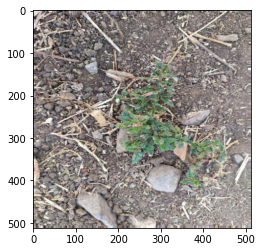

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = plt.imread('/content/data/agri_0_1009.jpeg')
plt.imshow(img)

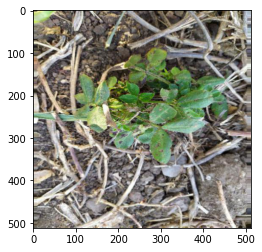

In [5]:
img2 = plt.imread('/content/data/agri_0_6891.jpeg')
plt.imshow(img2)

#Import necessary libraries

In [6]:
import os
import shutil
import math
import numpy as np
from ultralytics import YOLO




#Separate the Image and text file
In the Dataset images and labels in a same folder we must have separate it.

In [7]:
def separate_files(srclocation,deslocation,type_ofImage):
  if not os.path.exists("./"+deslocation):
    os.mkdir(deslocation)
  files = [t for t in os.listdir(srclocation) if type_ofImage in t.lower()]
  append_path=[]
  srclocation=srclocation+'/'
  for txt in files:
    temp = srclocation +(txt)
    append_path.append(temp)
  for image in append_path:
    newpath= deslocation+"/"
    shutil.move(image, newpath)

In [8]:
separate_files('/content/data','images/','.jpeg')

In [9]:
separate_files('/content/data','labels','.txt')

In [10]:
shutil.move('/content/labels','/content/data')
shutil.move('/content/images','/content/data')

'/content/data/images'

#Split folders 
 we have split the for train,test and val in a particular ratio.I can here used a split-folders packages for separate for in particular ratio.

 You can use split-folders as Python module or as a Command Line Interface (CLI).

If your datasets is balanced (each class has the same number of samples), choose ratio otherwise fixed.

In [11]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import splitfolders
splitfolders.ratio('/content/data','output',seed=1337,ratio=(.7,.15,.15),group_prefix=None,move=False)

Copying files: 2600 files [00:00, 4548.16 files/s]


In [13]:
testImageCount = [f for f in os.listdir('/content/output/test/images')]

In [14]:
len(testImageCount)

196

In [15]:
testLabelCount = [f for f in os.listdir('/content/output/test/labels')]

In [16]:
len(testLabelCount)

196

In [17]:
model = YOLO("yolov8n.pt") #Load a pretrained model

  0%|          | 0.00/6.23M [00:00<?, ?B/s]

#Custom dataset detection 

 In a custom data detection we have to create a YAML file.If need more details  about the Yaml file the details avaliable in readme.md file

In [18]:
model.train(data='custom.yaml', epochs=3)  # train the model

Ultralytics YOLOv8.0.40 🚀 Python-3.8.10 torch-1.13.1+cu116 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=custom.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, split=val, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=Fa

  0%|          | 0.00/755k [00:00<?, ?B/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

In [19]:
output_images = [t for t in os.listdir('/content/runs/detect/train') if '.jpg' in t.lower()]

In [20]:
output_images

['train_batch0.jpg',
 'train_batch1.jpg',
 'val_batch2_labels.jpg',
 'val_batch0_labels.jpg',
 'val_batch1_pred.jpg',
 'val_batch2_pred.jpg',
 'val_batch0_pred.jpg',
 'train_batch2.jpg',
 'val_batch1_labels.jpg']

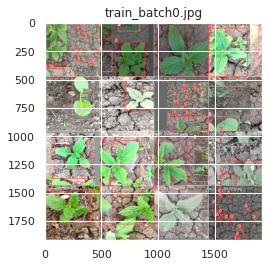

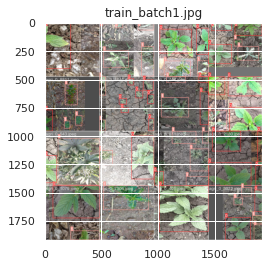

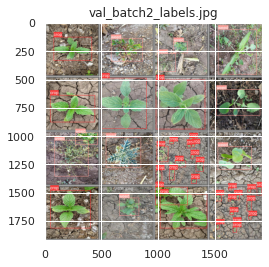

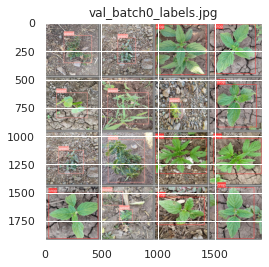

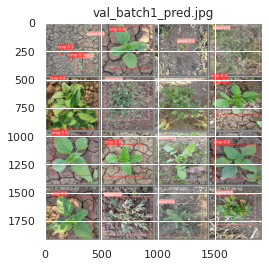

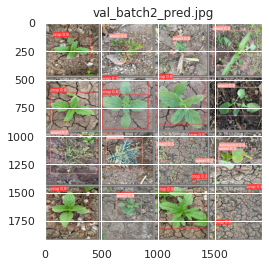

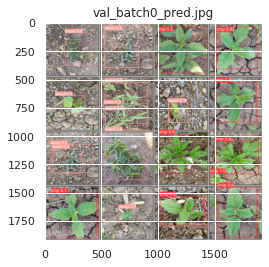

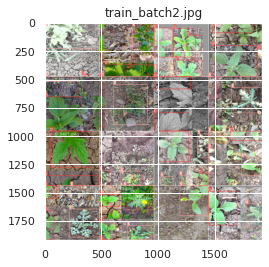

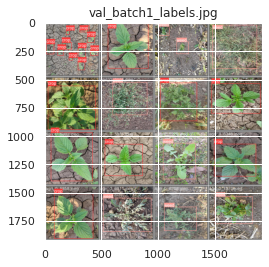

In [21]:
main_path = '/content/runs/detect/train/'
for image in output_images:
  path=main_path +image
  tmp = plt.imread(path)
  plt.imshow(tmp)
  plt.title(image)
  plt.show()
  

Plt the confusion matrix, F1 ,PR,P and R curve images

In [22]:
matrix_images = [t for t in os.listdir('/content/runs/detect/train') if '.png' in t.lower()]

In [23]:
matrix_images

['P_curve.png',
 'PR_curve.png',
 'results.png',
 'R_curve.png',
 'confusion_matrix.png',
 'F1_curve.png']

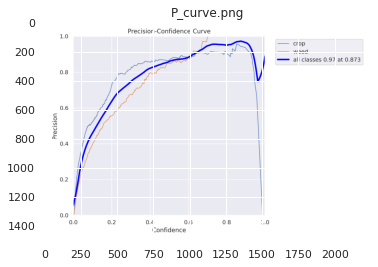

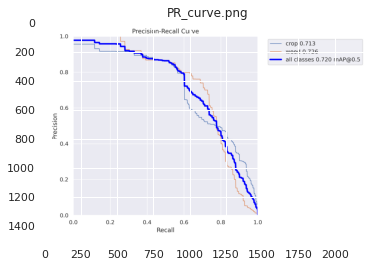

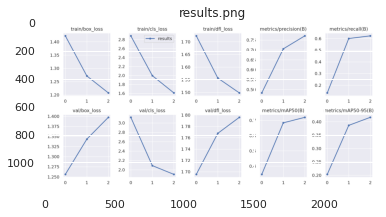

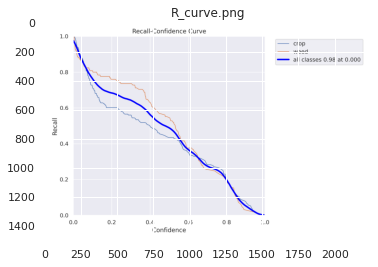

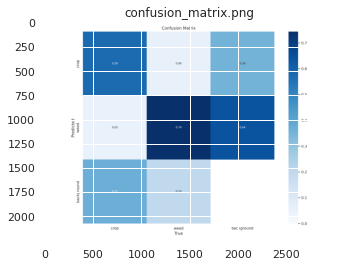

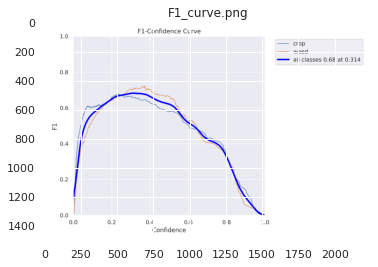

In [25]:
main_path = '/content/runs/detect/train/'
for image in matrix_images:
  path=main_path +image
  tmp = plt.imread(path)
  plt.imshow(tmp)
  plt.title(image)
  plt.show()


#We use our own model

Once the model is generated or trained our model saved in the runs/detect/train/weights folder(best.pt).Now we can deploy our new model.

In [26]:
model1  = YOLO('/content/runs/detect/train/weights/best.pt')

In [27]:
model1.val() 

Ultralytics YOLOv8.0.40 🚀 Python-3.8.10 torch-1.13.1+cu116 CPU
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/output/val/labels.cache... 195 images, 0 backgrounds, 0 corrupt: 100%|██████████| 195/195 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:32<00:00,  2.52s/it]
                   all        195        316      0.771      0.623       0.72      0.416
                  crop        195        191      0.837      0.534      0.713      0.445
                  weed        195        125      0.706      0.712      0.726      0.388
Speed: 1.1ms pre-process, 157.1ms inference, 0.0ms loss, 1.4ms post-process per image


In [28]:
model1.predict(source='/content/output/test/images',save=True)

Ultralytics YOLOv8.0.40 🚀 Python-3.8.10 torch-1.13.1+cu116 CPU

image 1/196 /content/output/test/images/agri_0_1026.jpeg: 640x640 1 crop, 177.5ms
image 2/196 /content/output/test/images/agri_0_1146.jpeg: 640x640 1 crop, 3 weeds, 174.5ms
image 3/196 /content/output/test/images/agri_0_1192.jpeg: 640x640 1 weed, 169.8ms
image 4/196 /content/output/test/images/agri_0_1210.jpeg: 640x640 1 weed, 177.9ms
image 5/196 /content/output/test/images/agri_0_1211.jpeg: 640x640 1 crop, 170.3ms
image 6/196 /content/output/test/images/agri_0_1258.jpeg: 640x640 1 weed, 175.7ms
image 7/196 /content/output/test/images/agri_0_1332.jpeg: 640x640 5 crops, 178.0ms
image 8/196 /content/output/test/images/agri_0_1334.jpeg: 640x640 1 weed, 169.2ms
image 9/196 /content/output/test/images/agri_0_1420.jpeg: 640x640 2 weeds, 171.9ms
image 10/196 /content/output/test/images/agri_0_1570.jpeg: 640x640 2 weeds, 169.2ms
image 11/196 /content/output/test/images/agri_0_1612.jpeg: 640x640 3 weeds, 170.8ms
image 12/196 /conte

[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([1, 6])
 dtype: torch.float32
  + tensor([[128.00000,  90.00000, 363.00000, 334.00000,   0.88462,   0.00000]]),
 Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([4, 6])
 dtype: torch.float32
  + tensor([[7.40000e+01, 1.29000e+02, 3.97000e+02, 3.08000e+02, 4.19017e-01, 1.00000e+00],
         [6.60000e+01, 1.29000e+02, 4.76000e+02, 3.61000e+02, 3.67427e-01, 1.00000e+00],
         [7.90000e+01, 1.31000e+02, 5.00000e+02, 5.11000e+02, 3.58578e-01, 1.00000e+00],
         [9.00000e+01, 1.35000e+02, 4.68000e+02, 5.12000e+02, 3.15328e-01, 0.00000e+00]]),
 Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([1, 6])
 dtype: torch.float32
  + tensor([[242.00000, 199.00000, 511.00000, 496.00000,   0.73484,   1.00000]]),
 Ultralytics YOLO <cla

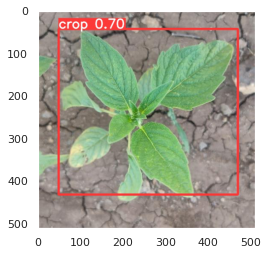

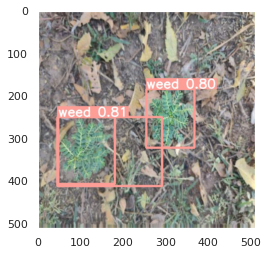

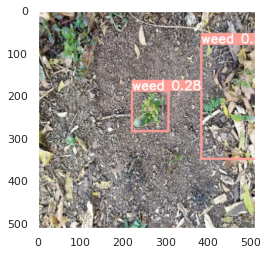

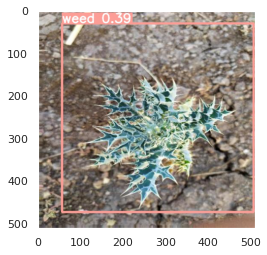

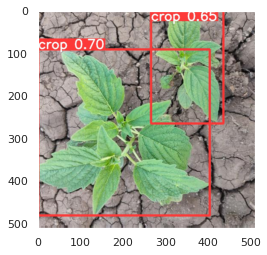

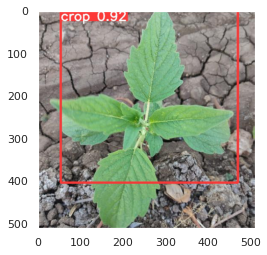

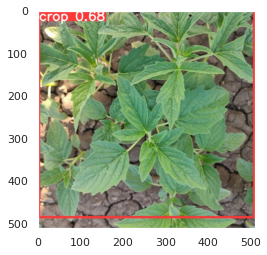

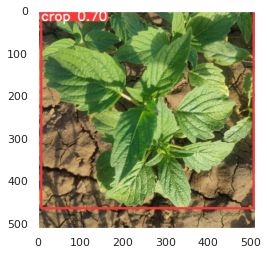

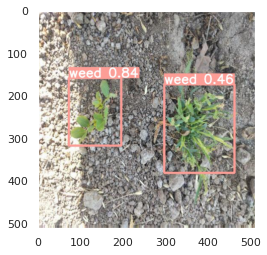

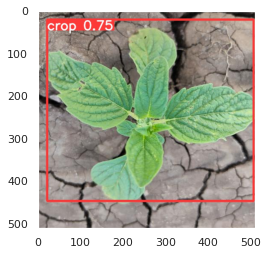

In [29]:
predicted_image = [t for t in os.listdir('/content/runs/detect/predict') if '.jpeg' in t.lower()]
predict_path='/content/runs/detect/predict/'
sample_image=predicted_image[10:20]
for image in sample_image:
    tmp=plt.imread(predict_path+image)
    plt.imshow(tmp)
    plt.grid(False)
    plt.show()